In [1]:
import pandas as pd
import numpy as np
import fastai
from fastai.vision.all import *
import dill

In [2]:
fastai.__version__, torch.__version__

('2.3.0', '1.7.0')

In [3]:
submission = pd.read_csv('../input/hotel-id-2021-fgvc8/sample_submission.csv')

test = submission.copy()

test['image'] = '../input/hotel-id-2021-fgvc8/test_images/' + test['image']
test

,image,hotel_id
0,../input/hotel-id-2021-fgvc8/test_images/99e91ad5f2870678.jpg,36363 53586 18807 64314 60181
1,../input/hotel-id-2021-fgvc8/test_images/b5cc62ab665591a9.jpg,36363 53586 18807 64314 60181
2,../input/hotel-id-2021-fgvc8/test_images/d5664a972d5a644b.jpg,36363 53586 18807 64314 60181


In [4]:
learn = load_learner(fname = Path('../input/hotel-train-fastai-densnet161/export_dn161_kaggle_notebook.pkl'), cpu=False, pickle_module=dill) #.to_fp32()

In [5]:
test_dl = learn.dls.test_dl(test)

In [6]:
#test_dl.after_batch #item

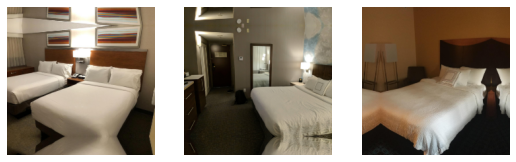

In [7]:
test_dl.show_batch() 

In [8]:
probs, _ = learn.tta(dl=test_dl)

In [9]:
preds_idx = probs.topk(5)[1]

In [10]:
preds = [' '.join(map(str, learn.dls.vocab[pred])) for pred in preds_idx]
preds[:5]

['971 55697 9874 63210 1501',
 '62229 4098 52976 16349 41583',
 '60667 30644 2829 3011 18839']

In [11]:
submission['hotel_id'] = preds

submission.to_csv('submission.csv', index = False)

submission.head()

,image,hotel_id
0,99e91ad5f2870678.jpg,971 55697 9874 63210 1501
1,b5cc62ab665591a9.jpg,62229 4098 52976 16349 41583
2,d5664a972d5a644b.jpg,60667 30644 2829 3011 18839
